In [2]:
%matplotlib inline

seed_value = 100
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

# Data uploading

In [20]:
AIRPORT_ICAO = "ESGG"
#AIRPORT_ICAO = "ESSA"

DATA_DIR = os.path.join("..", "..")
DATA_DIR = os.path.join(DATA_DIR, "data")
DATA_DIR = os.path.join(DATA_DIR, "Regression")

# AIF
#filename = AIRPORT_ICAO + "_metrics_AIF_vertical_PIs_by_hour.csv"
#full_filename = os.path.join(DATA_DIR, filename)
#metrics_AIF_vertical_PIs_by_hour_df = pd.read_csv(full_filename, sep=' ')
#metrics_AIF_vertical_PIs_by_hour_df.set_index(['AIF'], inplace=True)

filename = AIRPORT_ICAO + "_metrics_AIF_horizontal_PIs_by_hour.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_AIF_horizontal_PIs_by_hour_df = pd.read_csv(full_filename, sep=' ')
metrics_AIF_horizontal_PIs_by_hour_df.set_index(['AIF'], inplace=True)
print(metrics_AIF_horizontal_PIs_by_hour_df.head())

# WIF
#filename = airport_icao + "_metrics_WIF_PIs_by_flight_2019_2020.csv"
#full_filename = os.path.join(DATA_DIR, filename)
#metrics_WIF_PIs_by_flight_df = pd.read_csv(full_filename, sep=' ')
#metrics_WIF_PIs_by_flight_df.set_index(['WIF'], inplace=True)

#filename = airport_icao + "_metrics_WIF_horizontal_PIs_by_flight_2019_2020.csv"
#full_filename = os.path.join(DATA_DIR, filename)
#metrics_WIF_horizontal_PIs_by_flight_df = pd.read_csv(full_filename, sep=' ')
#metrics_WIF_horizontal_PIs_by_flight_df.set_index(['WIF'], inplace=True)


# TIF
#filename = airport_icao + "_metrics_TIF_PIs_by_flight_2019_2020.csv"
#full_filename = os.path.join(DATA_DIR, filename)
#metrics_TIF_PIs_by_flight_df = pd.read_csv(full_filename, sep=' ')
#metrics_TIF_PIs_by_flight_df.set_index(['TIF'], inplace=True)

#filename = airport_icao + "_metrics_TIF_horizontal_PIs_by_flight_2019_2020.csv"
#full_filename = os.path.join(DATA_DIR, filename)
#metrics_TIF_horizontal_PIs_by_flight_df = pd.read_csv(full_filename, sep=' ')
#metrics_TIF_horizontal_PIs_by_flight_df.set_index(['TIF'], inplace=True)

       date  hour  additionalDistanceMean  additionalDistanceMedian     i10fg  \
AIF                                                                             
11   190101     0                     0.0                       0.0  0.740673   
11   190101     1                     0.0                       0.0  0.785088   
10   190101     2                     0.0                       0.0  0.824258   
9    190101     3                     0.0                       0.0  0.820665   
8    190101     4                     0.0                       0.0  0.817325   

      wind100       cbh       lcc       tcc      cape        cp        tp  \
AIF                                                                         
11   0.840145  0.020975  0.652918  0.657245  0.000939  0.000006  0.009606   
11   0.886227  0.029874  0.544211  0.546305  0.001552  0.000751  0.025781   
10   0.915847  0.034661  0.312417  0.317998  0.002012  0.020021  0.033463   
9    0.911687  0.046785  0.080840  0.085514  0.

In [3]:
def fixAddDistance(distance):
    
    if distance < 0:
        return 0
    else:
        return distance

# Medians of Average Additional Distance in TMA vs AIF

       date  hour  additionalDistanceMean  additionalDistanceMedian     i10fg  \
AIF                                                                             
9    190101     8                -13.8250                   -13.825  0.694462   
8    190101     9                 20.1000                    20.100  0.670080   
8    190101    10                  3.7225                     4.225  0.658053   
9    190101    11                 -3.4600                    -3.460  0.643965   
7    190103    14                  7.8800                     7.880  0.091907   

      wind100       cbh       lcc       tcc      cape   cp        tp       sf  \
AIF                                                                             
9    0.817717  0.049888  0.009920  0.013126  0.000000  0.0  0.000000  0.00000   
8    0.792925  0.077709  0.005932  0.016064  0.000000  0.0  0.000000  0.00000   
8    0.789268  0.240678  0.010850  0.061605  0.000042  0.0  0.000000  0.00000   
9    0.756063  0.165452  0.

Text(2.585000000000001, 0.5, 'Additional Distance in TMA median [NM]')

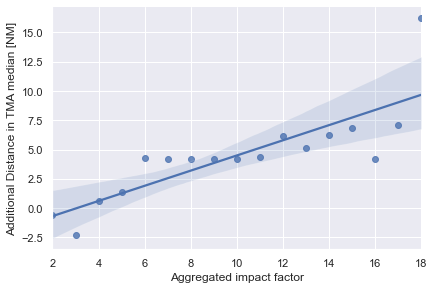

In [30]:
df = metrics_AIF_horizontal_PIs_by_hour_df
#df['TMA_additional_distance'] = df.apply(lambda row: fixAddDistance(row['TMA_additional_distance']), axis=1)
df = df[df['additionalDistanceMean']!=0]
print(df.head())
#df = df[df['additionalDistanceMean']>0]

# remove additional distance outliers
#p1 = df["additionalDistanceMedian"].quantile(0.05)
#p2 = df["additionalDistanceMedian"].quantile(0.95)
#df = df.loc[(df['additionalDistanceMedian'] > p1) & (df['additionalDistanceMedian'] < p2) ]
p2 = df["additionalDistanceMean"].quantile(0.95)
df = df.loc[df['additionalDistanceMean'] < p2]

median_df = pd.DataFrame(columns=['AIF', 'addDistanceMedian'])

for idx, group in df.groupby(level='AIF'):
    
    idx_df = df.loc[idx]['additionalDistanceMean']
    idx_median = np.median(idx_df) if idx_df.any() else 0
    
    median_df = median_df.append({'AIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)

#print(median_df.head())

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='AIF',y='addDistanceMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Aggregated impact factor')
plt.ylabel('Additional Distance in TMA median [NM]')


#statsmodel:
#X_df = median_df[['AIF']]
#y_df = median_df[['addDistanceMedian']]

#X2 = sm.add_constant(X_df.values)
#est = sm.OLS(y_df, X2)
#est2 = est.fit()
#print(est2.summary())

# Medians of Median Additional Distance in TMA vs AIF

       date  hour  additionalDistanceMean  additionalDistanceMedian     i10fg  \
AIF                                                                             
9    190101     8                -13.8250                   -13.825  0.694462   
8    190101     9                 20.1000                    20.100  0.670080   
8    190101    10                  3.7225                     4.225  0.658053   
9    190101    11                 -3.4600                    -3.460  0.643965   
7    190103    14                  7.8800                     7.880  0.091907   

      wind100       cbh       lcc       tcc      cape   cp        tp       sf  \
AIF                                                                             
9    0.817717  0.049888  0.009920  0.013126  0.000000  0.0  0.000000  0.00000   
8    0.792925  0.077709  0.005932  0.016064  0.000000  0.0  0.000000  0.00000   
8    0.789268  0.240678  0.010850  0.061605  0.000042  0.0  0.000000  0.00000   
9    0.756063  0.165452  0.

Text(2.585000000000001, 0.5, 'Additional Distance in TMA median [NM]')

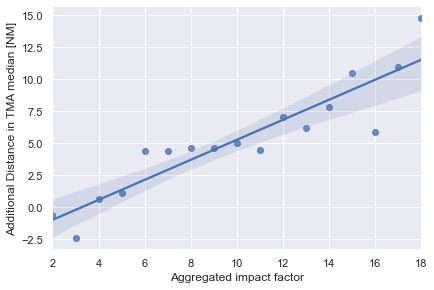

In [29]:
df = metrics_AIF_horizontal_PIs_by_hour_df
#df['TMA_additional_distance'] = df.apply(lambda row: fixAddDistance(row['TMA_additional_distance']), axis=1)
df = df[df['additionalDistanceMedian']!=0]
print(df.head())
#df = df[df['additionalDistanceMean']>0]

# remove additional distance outliers
#p1 = df["additionalDistanceMedian"].quantile(0.05)
#p2 = df["additionalDistanceMedian"].quantile(0.95)
#df = df.loc[(df['additionalDistanceMedian'] > p1) & (df['additionalDistanceMedian'] < p2) ]
p2 = df["additionalDistanceMedian"].quantile(0.95)
df = df.loc[df['additionalDistanceMedian'] < p2]

median_df = pd.DataFrame(columns=['AIF', 'addDistanceMedian'])

for idx, group in df.groupby(level='AIF'):
    
    idx_df = df.loc[idx]['additionalDistanceMedian']
    idx_median = np.median(idx_df) if idx_df.any() else 0
    
    median_df = median_df.append({'AIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)

#print(median_df.head())

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='AIF',y='addDistanceMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Aggregated impact factor')
plt.ylabel('Additional Distance in TMA median [NM]')


#statsmodel:
#X_df = median_df[['AIF']]
#y_df = median_df[['addDistanceMedian']]

#X2 = sm.add_constant(X_df.values)
#est = sm.OLS(y_df, X2)
#est2 = est.fit()
#print(est2.summary())

# Medians of Additional Distance in TMA vs TIF (2019-2020)

                             OLS Regression Results                            
Dep. Variable:     add_distance_median   R-squared:                       0.897
Model:                             OLS   Adj. R-squared:                  0.886
Method:                  Least Squares   F-statistic:                     78.72
Date:                 Sun, 27 Jun 2021   Prob (F-statistic):           9.59e-06
Time:                         14:52:44   Log-Likelihood:                -96.534
No. Observations:                   11   AIC:                             197.1
Df Residuals:                        9   BIC:                             197.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -56.1955    977.163     -0.05

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


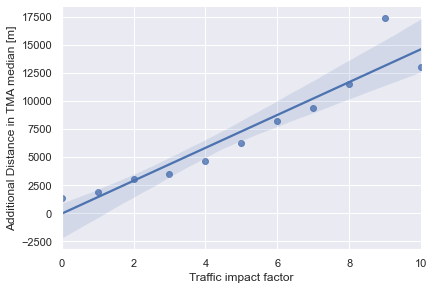

In [26]:
df = metrics_TIF_horizontal_PIs_by_flight_df
#df = df[df['TMA_additional_distance']>=0]

df['TMA_additional_distance'] = df.apply(lambda row: fixAddDistance(row['TMA_additional_distance']), axis=1)

median_df = pd.DataFrame(columns=['TIF', 'add_distance_median'])

for idx, group in df.groupby(level='TIF'):
    
    idx_df = df.loc[idx]['TMA_additional_distance']
    idx_median = np.median(idx_df) if idx_df.any() else 0
    
    median_df = median_df.append({'TIF': idx, 'add_distance_median': idx_median}, ignore_index=True)
    
sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='TIF',y='add_distance_median',data=median_df,fit_reg=True, height=4, aspect=3/2)
plt.xlabel('Traffic impact factor')
plt.ylabel('Additional Distance in TMA median [m]')

#statsmodel:
X_df = median_df[['TIF']]
y_df = median_df[['add_distance_median']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary())

# Medians of Additional Distance in TMA vs WIF (2019-2020)

                             OLS Regression Results                            
Dep. Variable:     add_distance_median   R-squared:                       0.378
Model:                             OLS   Adj. R-squared:                  0.309
Method:                  Least Squares   F-statistic:                     5.473
Date:                 Sun, 27 Jun 2021   Prob (F-statistic):             0.0441
Time:                         14:52:52   Log-Likelihood:                -102.16
No. Observations:                   11   AIC:                             208.3
Df Residuals:                        9   BIC:                             209.1
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3675.8069   1630.182      2.25

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


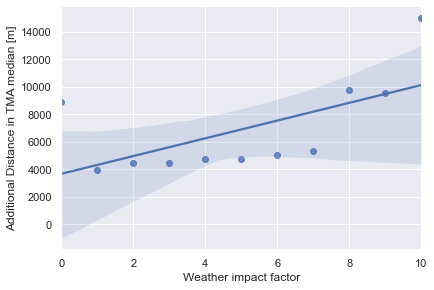

In [27]:
df = metrics_WIF_horizontal_PIs_by_flight_df
#df = df[df['TMA_additional_distance']>=0]

df['TMA_additional_distance'] = df.apply(lambda row: fixAddDistance(row['TMA_additional_distance']), axis=1)

median_df = pd.DataFrame(columns=['WIF', 'add_distance_median'])

for idx, group in df.groupby(level='WIF'):
    
    idx_df = df.loc[idx]['TMA_additional_distance']
    idx_median = np.median(idx_df) if idx_df.any() else 0
    
    median_df = median_df.append({'WIF': idx, 'add_distance_median': idx_median}, ignore_index=True)
    
sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='WIF',y='add_distance_median',data=median_df,fit_reg=True, height=4, aspect=3/2)
plt.xlabel('Weather impact factor')
plt.ylabel('Additional Distance in TMA median [m]')

#statsmodel:
X_df = median_df[['WIF']]
y_df = median_df[['add_distance_median']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary())

# Medians of Time on Levels vs. AIF (2019-2020)

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                              OLS Regression Results                             
Dep. Variable:     time_on_levels_median   R-squared:                       0.601
Model:                               OLS   Adj. R-squared:                  0.561
Method:                    Least Squares   F-statistic:                     15.04
Date:                   Thu, 24 Jun 2021   Prob (F-statistic):            0.00307
Time:                           17:57:51   Log-Likelihood:                 7.2532
No. Observations:                     12   AIC:                            -10.51
Df Residuals:                         10   BIC:                            -9.536
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5083 

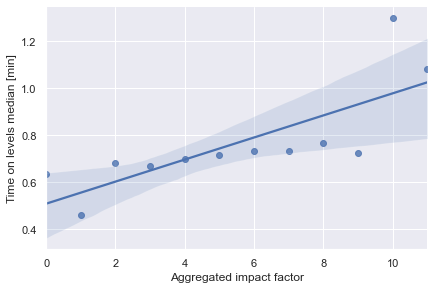

In [7]:
df = metrics_AIF_PIs_by_flight_df

# remove time on levels outliers
p1 = df["time_on_levels"].quantile(0.1)
p2 = df["time_on_levels"].quantile(0.95)
df = df.loc[(df['time_on_levels'] > p1) & (df['time_on_levels'] < p2) ]

median_df = pd.DataFrame(columns=['AIF', 'time_on_levels_median'])

for idx, group in df.groupby(level='AIF'):
    
    idx_df = df.loc[idx]['time_on_levels']
    idx_median = np.median(idx_df) if idx_df.any() else 0
    
    median_df = median_df.append({'AIF': idx, 'time_on_levels_median': idx_median}, ignore_index=True)
    
sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='AIF',y='time_on_levels_median',data=median_df,fit_reg=True, height=4, aspect=3/2)
plt.xlabel('Aggregated impact factor')
plt.ylabel('Time on levels median [min]')

#statsmodel:
X_df = median_df[['AIF']]
y_df = median_df[['time_on_levels_median']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary())

# Medians of Time on Levels vs TIF (2019-2020)

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                              OLS Regression Results                             
Dep. Variable:     time_on_levels_median   R-squared:                       0.002
Model:                               OLS   Adj. R-squared:                 -0.109
Method:                    Least Squares   F-statistic:                   0.01580
Date:                   Thu, 24 Jun 2021   Prob (F-statistic):              0.903
Time:                           17:57:52   Log-Likelihood:                 16.457
No. Observations:                     11   AIC:                            -28.91
Df Residuals:                          9   BIC:                            -28.12
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6916 

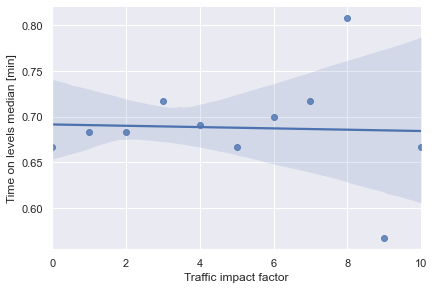

In [8]:
df = metrics_TIF_PIs_by_flight_df

# remove time on levels outliers
p1 = df["time_on_levels"].quantile(0.05)
p2 = df["time_on_levels"].quantile(0.95)
df = df.loc[(df['time_on_levels'] > p1) & (df['time_on_levels'] < p2) ]

median_df = pd.DataFrame(columns=['TIF', 'time_on_levels_median'])

for idx, group in df.groupby(level='TIF'):
    
    idx_df = df.loc[idx]['time_on_levels']
    idx_median = np.median(idx_df) if idx_df.any() else 0
    
    median_df = median_df.append({'TIF': idx, 'time_on_levels_median': idx_median}, ignore_index=True)
    
sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='TIF',y='time_on_levels_median',data=median_df,fit_reg=True, height=4, aspect=3/2)
plt.xlabel('Traffic impact factor')
plt.ylabel('Time on levels median [min]')


#statsmodel:
X_df = median_df[['TIF']]
y_df = median_df[['time_on_levels_median']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary())

# Medians of Time on Levels vs. WIF (2019-2020)

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                              OLS Regression Results                             
Dep. Variable:     time_on_levels_median   R-squared:                       0.607
Model:                               OLS   Adj. R-squared:                  0.558
Method:                    Least Squares   F-statistic:                     12.35
Date:                   Thu, 24 Jun 2021   Prob (F-statistic):            0.00790
Time:                           17:57:53   Log-Likelihood:                 19.681
No. Observations:                     10   AIC:                            -35.36
Df Residuals:                          8   BIC:                            -34.76
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6591 

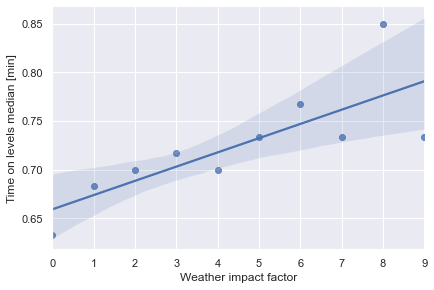

In [9]:
df = metrics_WIF_PIs_by_flight_df
df = df.dropna()

# remove time on levels outliers
p1 = df["time_on_levels"].quantile(0.05)
p2 = df["time_on_levels"].quantile(0.95)
df = df.loc[(df['time_on_levels'] > p1) & (df['time_on_levels'] < p2) ]

median_df = pd.DataFrame(columns=['WIF', 'time_on_levels_median'])

for idx, group in df.groupby(level='WIF'):
    
    idx_df = df.loc[idx]['time_on_levels']
    idx_median = np.median(idx_df) if idx_df.any() else 0
    
    median_df = median_df.append({'WIF': idx, 'time_on_levels_median': idx_median}, ignore_index=True)
    
sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='WIF',y='time_on_levels_median',data=median_df,fit_reg=True, height=4, aspect=3/2)
plt.xlabel('Weather impact factor')
plt.ylabel('Time on levels median [min]')


#statsmodel:
X_df = median_df[['WIF']]
y_df = median_df[['time_on_levels_median']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary())